In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

def load_csv():
    print("Choose CSV input method:")
    print("1. Upload from local computer")
    print("2. Enter URL manually")
    print("3. Use hardcoded URL")

    choice = input("Enter choice (1/2/3): ")

    if choice == '1':
        path = input("Enter full path to local CSV file: ")
        df = pd.read_csv(path)
    elif choice == '2':
        url = input("Enter CSV URL: ")
        response = requests.get(url)
        df = pd.read_csv(StringIO(response.text))
    elif choice == '3':
        url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"
        response = requests.get(url)
        df = pd.read_csv(StringIO(response.text))
    else:
        print("Invalid choice.")
        return None

    return df

In [ ]:
def explore_dataframe(df):
    print("\n Column Headings:")
    print(df.columns.tolist())

    print("\n First Two Rows:")
    print(df.head(2))

    columns = df.columns.tolist()
    return columns

In [ ]:
def plot_columns(df, columns):
    print("\nChoose columns to plot:")
    for i, col in enumerate(columns):
        print(f"{i}: {col}")

    x_index = int(input("Enter index for X-axis column: "))
    y_index = int(input("Enter index for Y-axis column: "))

    x = np.array(df[columns[x_index]])
    y = np.array(df[columns[y_index]])

    graph_type = input("Choose graph type (scatter/line): ").lower()

    plt.figure(figsize=(8, 6))
    if graph_type == "scatter":
        plt.scatter(x, y)
    else:
        plt.plot(x, y)

    plt.xlabel(columns[x_index])
    plt.ylabel(columns[y_index])
    plt.title(f"{graph_type.capitalize()} Plot of {columns[x_index]} vs {columns[y_index]}")
    plt.grid(True)
    plt.show()

Choose CSV input method:
1. Upload from local computer
2. Enter URL manually
3. Use hardcoded URL
Enter choice (1/2/3): 3

 Column Headings:
['Index', ' Height(Inches)"', ' "Weight(Pounds)"']

 First Two Rows:
   Index   Height(Inches)"   "Weight(Pounds)"
0      1             65.78             112.99
1      2             71.52             136.49

Choose columns to plot:
0: Index
1:  Height(Inches)"
2:  "Weight(Pounds)"
Enter index for X-axis column: 1
Enter index for Y-axis column: 2
Choose graph type (scatter/line): scatter


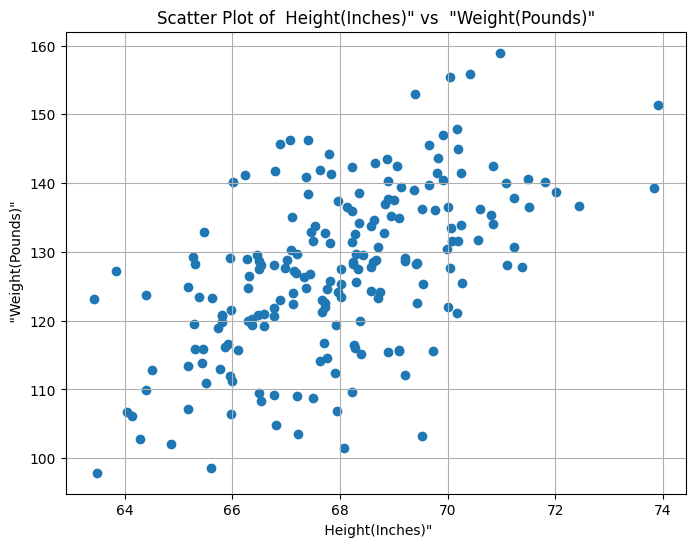

In [ ]:
def main():
    df = load_csv()
    if df is not None:
        columns = explore_dataframe(df)
        plot_columns(df, columns)

main()